<a href="https://colab.research.google.com/github/FeisTfue/distancias-clustering/blob/main/distancia_manhattan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cluster 1: [[1, 185, 72], [4, 179, 68], [5, 182, 72], [6, 188, 77]]
Cluster 2: [[2, 170, 56], [3, 168, 60]]


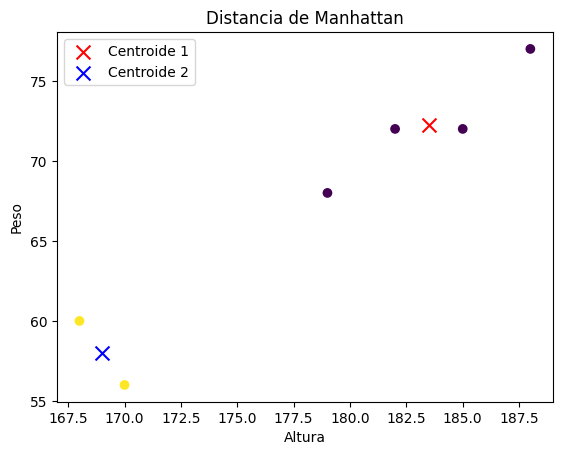

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
data = [
    [1, 185, 72],
    [2, 170, 56],
    [3, 168, 60],
    [4, 179, 68],
    [5, 182, 72],
    [6, 188, 77]
]

# Definir centroides iniciales
k1 = np.array([185, 72])
k2 = np.array([170, 56])

max_iterations = 100

for _ in range(max_iterations):
    # Calculo la distancia de Manhattan a los centroides
    dist_to_k1 = np.sum(np.abs(np.array(data)[:, 1:] - k1), axis=1)
    dist_to_k2 = np.sum(np.abs(np.array(data)[:, 1:] - k2), axis=1)

    # Asignacion de los  puntos al cluster más cercano
    labels = np.where(dist_to_k1 < dist_to_k2, 0, 1)

    # Actualizacion de los centroides
    k1 = np.mean(np.array(data)[labels == 0, 1:], axis=0)
    k2 = np.mean(np.array(data)[labels == 1, 1:], axis=0)

# Resultados
for i in range(2):
    cluster_points = [data[j] for j in range(len(data)) if labels[j] == i]
    print(f'Cluster {i + 1}: {cluster_points}')

plt.scatter(np.array(data)[:, 1], np.array(data)[:, 2], c=labels)
plt.scatter(k1[0], k1[1], c='red', marker='x', s=100, label='Centroide 1')
plt.scatter(k2[0], k2[1], c='blue', marker='x', s=100, label='Centroide 2')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title('Distancia de Manhattan')
plt.legend()
plt.show()

# El "Cluster 1" contiene los puntos que se consideran más cercanos al primer centroide, y el "Cluster 2" contiene los puntos que se consideran más cercanos al segundo centroide.